In [1]:
%matplotlib inline

In [2]:
from KnackpackData import getEncoded,getScores,scoreFunction,n_items
import matplotlib.pyplot as plt
import numpy as np
import random

## Initial population takes 20% of items

In [3]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool_)
        chromosome[:int(0.8*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

## Fitness score by value of backpack

In [4]:
def fitness_score(population):
    return np.array(list(map(scoreFunction, population)))

## Roulette wheel selection

In [5]:
def selection(scores,population_nextgen,k,population_size):
    return random.choices(population_nextgen, weights = scores, k=population_size)

## Single point crossover

In [6]:
def crossover(pop_after_sel,crossover_rate):
    def crossingMethod(index):
        point = random.randint(0, len(pop_after_sel[0]))
        next_index = (index+1)%len(pop_after_sel)
        return np.concatenate((pop_after_sel[index][:point],pop_after_sel[next_index][point:]))
    childrens = np.array([crossingMethod(index) for index in range(len(pop_after_sel)) if random.random() < crossover_rate])
    return np.concatenate((pop_after_sel,childrens))

## Bit flip mutation

In [7]:
def mutation(pop_after_cross,mutation_rate):
    def mutate(unit):
        i = random.randint(0, len(unit)-1)
        unit[i]=!unit[i]
        return unit
    return np.array([mutate(cross) if random.random() < mutation_rate else cross for cross in pop_after_cross ])

## Generation loop with stop conditions:

* no change of best score through *max_stale_iterations*

*  90% of the population fall within convergence of the fittest individual

In [8]:
from math import isclose
def generations(population_size,n_feat,crossover_rate,mutation_rate,k_tournament,max_iteration,max_stale_iterations):
    def pupulation_in_convergence(scores,iteration_best_score):
        return sum(isclose(iteration_best_score,score) for score in scores)/scores.size>0.9
    alltime_best_score = 0
    stale_iteration = 0
    stop_reason = "Reached max_iteration!"
    # fittest does not change
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(population_size,n_feat)
    for i in range(max_iteration):
        scores = fitness_score(population_nextgen)
        bestIndex = np.argmax(scores)
        best_chromo.append(population_nextgen[bestIndex])
        best_score.append(scores[bestIndex])
        
        pop_after_sel = selection(scores,population_nextgen,k_tournament,population_size)
        pop_after_cross = crossover(pop_after_sel,crossover_rate)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        
        if alltime_best_score >= scores[bestIndex]:
            stale_iteration+=1
        else :
            stale_iteration=0
            alltime_best_score = scores[bestIndex]
        
        if stale_iteration>=max_stale_iterations:
            stop_reason = "Reached max_stale_iterations!"
            break
        if pupulation_in_convergence(scores,scores[bestIndex]):
            stop_reason = "Pupulation converge in 90%!"
            break
  
    return best_chromo,best_score,stop_reason

## Visualization methods

In [9]:
from operator import itemgetter
def plotScore(scores,bestindex):
    plt.figure(figsize=(8, 6), dpi=80) 
    plt.plot(scores)
    plt.scatter(bestindex, scores[bestindex],color="g",s=50)
    plt.annotate("best", (bestindex,scores[bestindex]))
    plt.ylabel('scores')
    plt.show()
    
def getBest(chromosomes,scores):
    best = max(zip(chromosomes,scores), key=itemgetter(1))
    bestindex = scores.index(best[1])
    return best,bestindex

Reached max_stale_iterations!


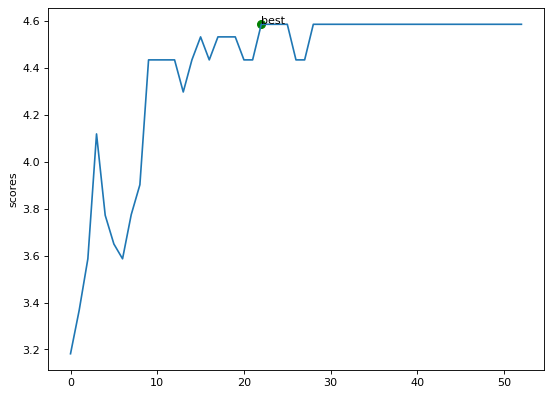

Final value[ True  True  True  True  True False  True  True False  True False False
  True False False False]=4.584568023681641


In [10]:
np.random.seed(seed=1337)
random.seed(1337)
chromo,score,stop_reason=generations(population_size=100,n_feat=n_items,crossover_rate=0.1,mutation_rate=0.3,k_tournament=0,max_iteration=100,max_stale_iterations=30)
print(stop_reason)
best,bestindex = getBest(chromo,score)
plotScore(score,bestindex)
x = best[0]
y = scoreFunction(best[0])
print(f"Final value{x}={y}")

## Wynik 
Nie jest maksimum globalnym

## K-Tournament Selection(20)

In [11]:
def selection(scores,population_nextgen,k,population_size):
    def tournament_selection(indices):
        return population_nextgen[max(indices,key=lambda index:scores[index])]
    return np.array([tournament_selection(random.choices(range(scores.size),k = k)) for _ in range(population_size)])

## Two point mutation?

In [12]:
def mutation(pop_after_cross,mutation_rate):
    def mutate(unit):
        i = random.randint(0, len(unit)-1)
        j = random.randint(0, len(unit)-1)
        unit[i]=!unit[i]
        unit[j]=!unit[j]
        return unit
    return np.array([mutate(cross) if random.random() < mutation_rate else cross for cross in pop_after_cross ])

## To use with SIMULATED ANNEALING ALGORITHM

Reached max_stale_iterations!


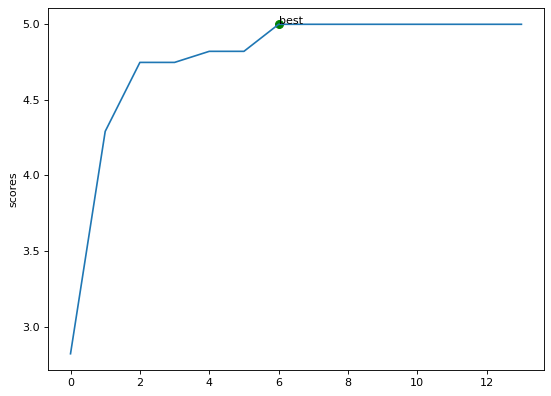

Final value[ True  True  True  True  True False False False False  True  True False
  True False False  True]=4.996682643890381


In [13]:
chromo,score,stop_reason=generations(population_size=100,n_feat=n_items,crossover_rate=0.8,mutation_rate=0.2,k_tournament=20,max_iteration=100,max_stale_iterations=7)
print(stop_reason)
best,bestindex = getBest(chromo,score)
plotScore(score,bestindex)
x = best[0]
y = scoreFunction(best[0])
print(f"Final value{x}={y}")

## Wynik 
Wynik to maksimum globalne